## 과학교육에서의 모델링 연구에 대한 크롤링과 자연어 처리의 결합

## Loading Files

In [32]:
import pandas as pd
import numpy as np

df = pd.read_excel('Data/model_wos.xlsx', index_col=0, engine='openpyxl')
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Oh, PS; Oh, SJ",NaN,NaN,NaN,"Oh, Phil Seok; Oh, Sung Jin",NaN,NaN,What Teachers of Science Need to Know about Mo...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,891LN,NaN,NaN,NaN,NaN,2022-08-31,WOS:000300218600004,0
1,J,"Aktan, MB",NaN,NaN,NaN,"Aktan, Mustafa Bahadir",NaN,NaN,Pre-service Science Teachers' Views and Conten...,EGITIM VE BILIM-EDUCATION AND SCIENCE,...,Social Science Citation Index (SSCI),Education & Educational Research,141RG,NaN,NaN,NaN,NaN,2022-08-31,WOS:000318743600029,0
2,J,"Cheng, MF; Lin, JL",NaN,NaN,NaN,"Cheng, Meng-Fei; Lin, Jang-Long",NaN,NaN,Investigating the Relationship between Student...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,CT3RV,NaN,NaN,NaN,NaN,2022-08-31,WOS:000362725500003,0
3,J,"Soltani, A",NaN,NaN,NaN,"Soltani, Asghar",NaN,NaN,"Influence of Motivating Science Class, Family,...",RESEARCH IN SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,NV3NQ,NaN,NaN,NaN,NaN,2022-08-31,WOS:000574233300001,0
4,J,"Krell, M; Walzer, C; Hergert, S; Kruger, D",NaN,NaN,NaN,"Krell, Moritz; Walzer, Christine; Hergert, Sus...",NaN,NaN,Development and Application of a Category Syst...,RESEARCH IN SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,JH0NM,NaN,NaN,NaN,NaN,2022-08-31,WOS:000492471000008,0


In [33]:
df2 = df[['Authors', 'Article Title', 'Source Title', 'Journal Abbreviation', 'Author Keywords', 'Keywords Plus', 
          'Abstract', 'Cited Reference Count', 'Times Cited, All Databases', 'Publication Year', 'DOI Link']]
df2.columns = ['Author', 'Title', 'Source', 'Abbr', 'Keyword', 'KeyPlus', 'Abstract', 'CitedCnt', 'Cite', 'Year', 'Link']
df2.head()

,Author,Title,Source,Abbr,Keyword,KeyPlus,Abstract,CitedCnt,Cite,Year,Link
0,"Oh, PS; Oh, SJ",What Teachers of Science Need to Know about Mo...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,INT J SCI EDUC,Model; Modelling; Scientific model; Science te...,HIGH-SCHOOL-STUDENTS; KNOWLEDGE; INQUIRY; UNDE...,The purpose of this article is to provide an o...,95,152,2011.0,0.0
1,"Aktan, MB",Pre-service Science Teachers' Views and Conten...,EGITIM VE BILIM-EDUCATION AND SCIENCE,EGIT BILIM,Pre-service science teachers; models; modeling...,TEACHING MODELS; EDUCATION; CONCEPTIONS; STUDE...,The aim of this study was to investigate pre-s...,37,2,2013.0,NaN
2,"Cheng, MF; Lin, JL",Investigating the Relationship between Student...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,INT J SCI EDUC,Magnetism; Model construction; Modeling practi...,UNDERSTANDING MODELS; EXPLANATORY MODELS; SCIE...,Understanding the nature of models and engagin...,69,31,2015.0,0.0
3,"Soltani, A","Influence of Motivating Science Class, Family,...",RESEARCH IN SCIENCE EDUCATION,RES SCI EDUC,Motivating science class; Family models; Peer ...,EDUCATIONAL PRODUCTIVITY; CONTINUING MOTIVATIO...,"Classroom environment, family, and peers are i...",103,5,2020.0,0.0
4,"Krell, M; Walzer, C; Hergert, S; Kruger, D",Development and Application of a Category Syst...,RESEARCH IN SCIENCE EDUCATION,RES SCI EDUC,Scientific modelling; Modelling strategy; Qual...,KNOWLEDGE; STUDENTS,"As part of their professional competencies, sc...",72,11,2019.0,0.0


In [34]:
import warnings
warnings.filterwarnings('ignore')

df2['Title'] = df2['Title'].str.lower()
df2['Source'] = df2['Source'].str.title()
df2['Abbr'] = df2['Abbr'].str.title()
df2['Keyword'] = df2['Keyword'].str.lower()
df2['KeyPlus'] = df2['KeyPlus'].str.lower()

In [35]:
df2 = df2.dropna(subset = ['Abstract'])
df2 = df2.reset_index()

In [36]:
df2.shape

(11301, 12)

In [37]:
df2.to_excel('Data/model_wos_r.xlsx')

## Load refined files

In [38]:
import pandas as pd

df2 = pd.read_excel('Data/model_wos_r.xlsx', index_col=0)

In [39]:
df2.dtypes

index         int64
Author       object
Title        object
Source       object
Abbr         object
Keyword      object
KeyPlus      object
Abstract     object
CitedCnt      int64
Cite          int64
Year        float64
Link        float64
dtype: object

In [41]:
df2.tail()

,index,Author,Title,Source,Abbr,Keyword,KeyPlus,Abstract,CitedCnt,Cite,Year,Link
11296,11391,"Cao, Y; AlKubaisy, ZM; Stojanovic, J; Denic, N...",appraisal of information and communications te...,Computer Applications In Engineering Education,Comput Appl Eng Educ,educational software; lecture; neuro-fuzzy; st...,mathematics education research; inference syst...,The use of modern information and communicatio...,64,0,2022.0,0.0
11297,11392,"Schwenk, J; Hossain, F; Huddleston, D",a computer-aided visualization tool for stocha...,Computer Applications In Engineering Education,Comput Appl Eng Educ,water resources engineering; stochastic theory...,science,"In this paper, we propose and demonstrate the ...",29,2,2009.0,0.0
11298,11393,"Boussion, S",des refugies pour eduquer les enfants refugies...,Paedagogica Historica,Paedagog Hist,monitors; children's homes; refugees; internat...,NaN,At the heart of refuge in Switzerland during t...,31,0,NaN,0.0
11299,11394,"Bray, MJ; Bradley, EB; Martindale, JR; Gusic, ME",implementing systematic faculty development to...,Teaching And Learning In Medicine,Teach Learn Med,epa assessment; faculty development; program e...,entrustable professional activities; entrustme...,"Problem: Development of a novel, competency-ba...",60,4,2021.0,0.0
11300,11395,"Davis, DS; Huang, B; Yi, T",making sense of science texts: amixed-methods ...,Reading Research Quarterly,Read Res Quart,comprehension; content literacy; domain knowle...,reading-comprehension; language proficiency; o...,Previous research has identified various facto...,85,20,2017.0,0.0


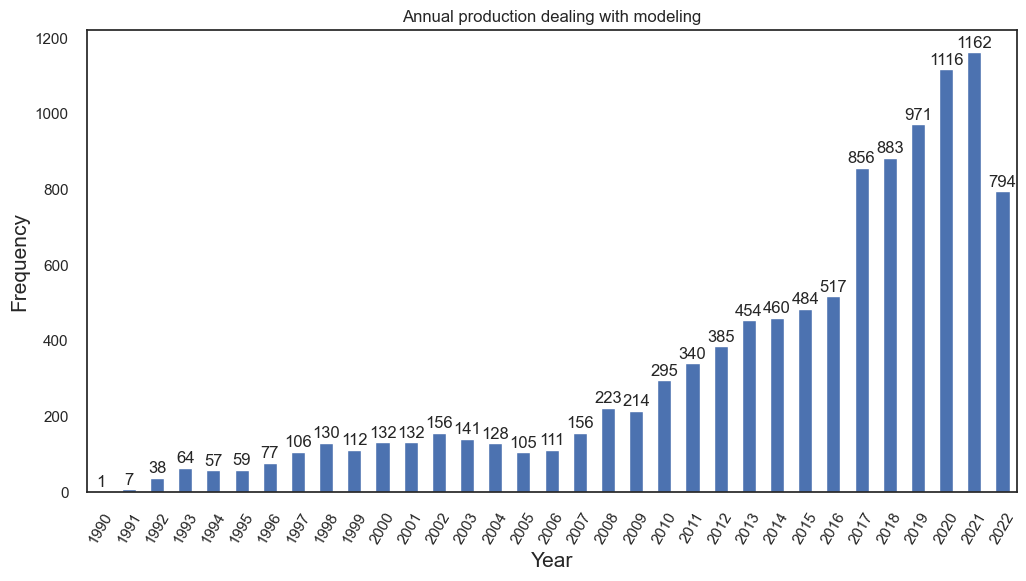

In [42]:
import matplotlib.pyplot as plt
import numpy as np

yr_series = df2.Year.value_counts().sort_index()
xlabs = [int(data) for data in yr_series.index]

# Plot the figure
plt.figure(figsize=(12, 6))
ax = yr_series.plot(kind="bar")
ax.set_title("Annual production dealing with modeling")
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xticklabels(xlabs, rotation=60)

rects = ax.patches

# Make some labels
labels = [i for i in yr_series]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

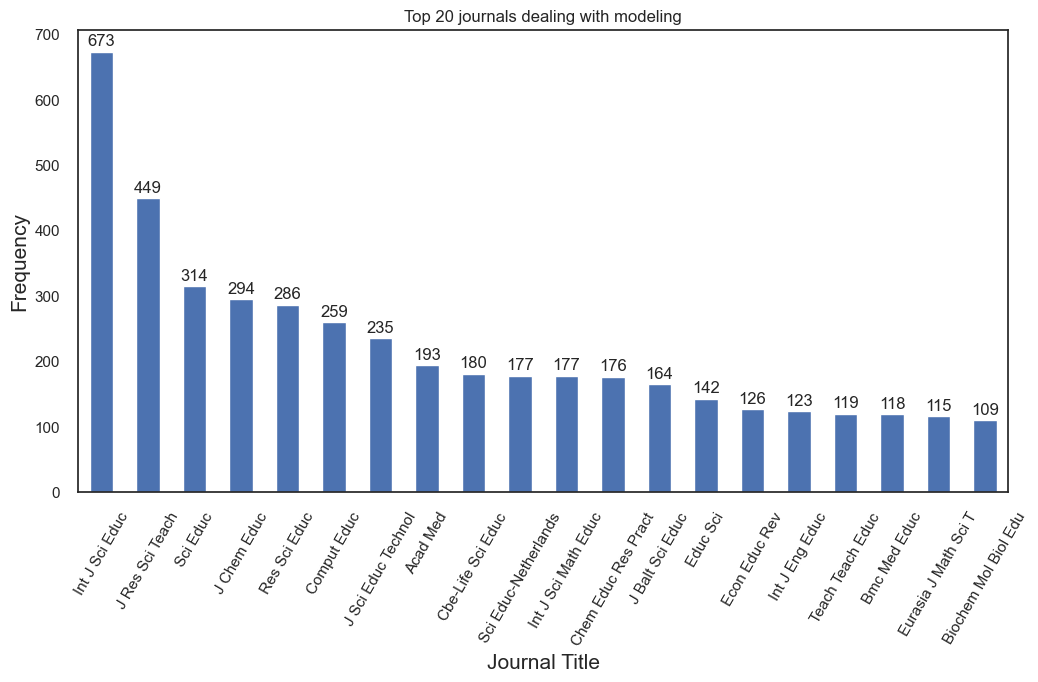

In [43]:
src_series = df2.Abbr.value_counts()[0:20]

# Plot the figure
plt.figure(figsize=(12, 6))
ax = src_series.plot(kind="bar")
ax.set_title("Top 20 journals dealing with modeling")
ax.set_xlabel("Journal Title", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xticklabels(src_series.index, rotation=60)

rects = ax.patches

# Make some labels
labels = [src_series[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

### Document Embedding using BERT

In [7]:
!pip list | grep sent

sentence-transformers 2.2.2
sentencepiece         0.1.97


In [ ]:
!pip install sentence-transformers

In [44]:
from sentence_transformers import SentenceTransformer

sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [9]:
#시스템에 따라 매우 시간이 오래 걸립니다.
%%time

document_embeddings = sbert_model.encode(df2['Abstract'])

In [10]:
document_embeddings.shape

(11301, 768)

BERT는 768차원짜리 벡터를 만들어 낸다.

In [12]:
import joblib

joblib.dump(document_embeddings, 'doc_embedding.pkl')

['doc_embedding.pkl']

## UMAP을 이용한 데이터 시각화

<b>UMAP(Uniform Manifold Approximation and Projection)이란?</b><br><br>
UMAP은 t-SNE처럼 차원을 축소하기 위한 기법으로 비선형 차원 축소에도 사용되는 방법이다.<br>
t-SNE 역시 차원축소 방법의 하나이지만 t-SNE는 다차원에서의 유클리디언 거리를 정규 분포로 만들면서 왜곡이 생기지만<br>
UMAP는 그러한 왜곡 없이 확률 분포 등의 특징을 유지하는 성질이 있다.

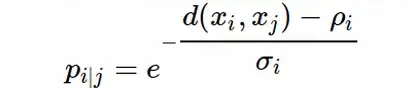

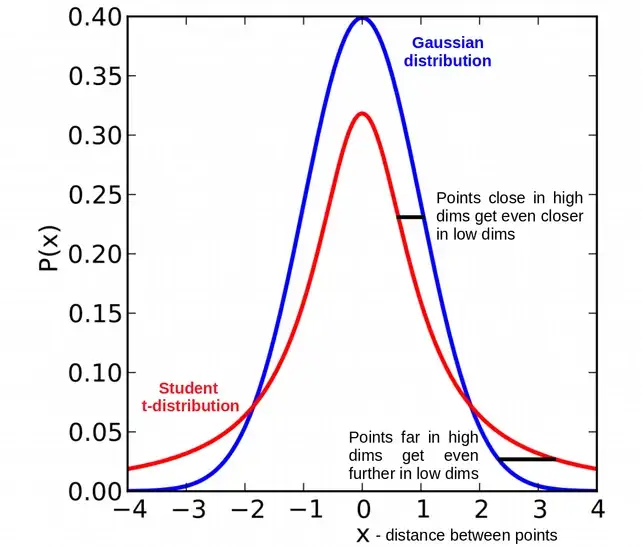

https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668

In [28]:
!pip install umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/hunkoog/anaconda3/envs/knlp

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8

가상환경을 사용하는 경우, 간혹 pip install {패키지명} 이 제대로 실행되지 않는 경우가 있다.<br>
이런 경우에는 다음과 같은 방법을 통해 설치할 수 있다.<br><br>
<b>1. conda install -c conda-forge {패키지명}</b><br>
conda install 명령어도 pip처럼 패키지를 설치하는 명령어이며, conda-forge는 conda-forge라는 커뮤니티에서 검증된 형태로 설치함을 의미한다.<br><br>
<b>2. pip install git+{패키지가 속한 주소}</b><br>
github를 이용하는 경우, 해당 주소로부터 바로 다운로드 받아서 설치하는 방법이다.<br>
예를 들어 Yellowbrick이라는 패키지의 주소는 https://github.com/DistrictDataLabs/yellowbrick.git 인데<br>
이것은 pip install Yellowbrick을 이용할 수도 있지만<br>
pip install git+https://github.com/DistrictDataLabs/yellowbrick.git 으로도 가능하다.

In [45]:
import joblib

document_embeddings = joblib.load('doc_embedding.pkl')

In [46]:
%%time

import umap

X_embedded = umap.UMAP(n_components=2, n_epochs=2000, learning_rate=0.001).fit_transform(document_embeddings)

df_embeddings = pd.DataFrame(X_embedded)
df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})

CPU times: user 1min 8s, sys: 1.08 s, total: 1min 9s
Wall time: 16.8 s


## 2D Visualization

In [17]:
!pip install yellowbrick

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 3.3 MB/s eta 0:00:0000:0100:01


### K-Means clustering

K-Means clustering은 비지도학습 방법의 하나로서, K개의 집단으로 나누어져 있다고 가정하고 각 중점(centeroid)을 기준으로 할당하게 된다.<br>
이 때, 몇 개의 집단으로 나누어야 할 지 알지 못하기 때문에 K의 값을 변화하면서 군집을 구성하게 되는데 왜곡 정도가 급격히 꺾이는 지점을 적절한 군집의 숫자로 보는 방식을 Elbow method라고 한다.

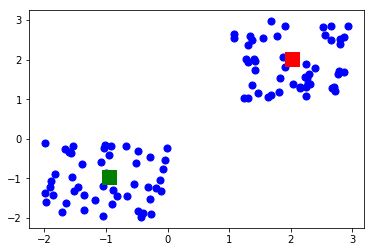

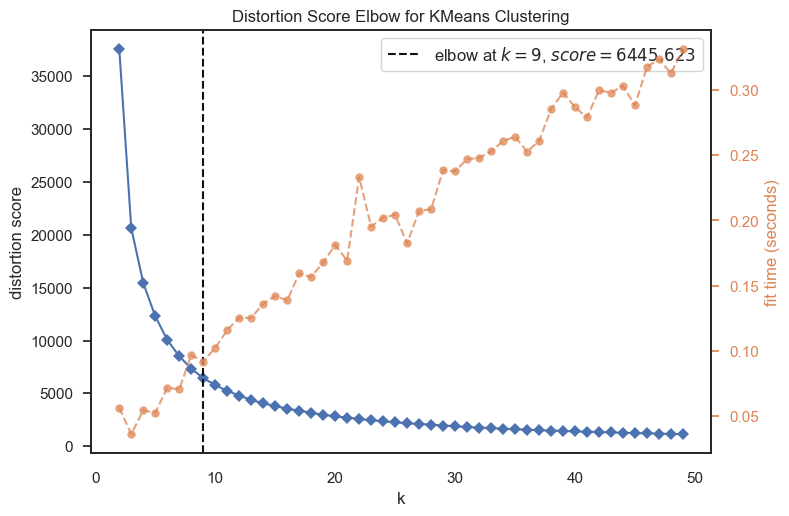

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore')

model2 = KMeans()
# k is range of number of clusters
visualizer = KElbowVisualizer(model2, k=(2,50), timings= True)
visualizer.fit(df_embeddings)
visualizer.show()

In [48]:
# 위의 K-Mean 결과를 보면 9가 최적화된 값임
kmeans = KMeans(n_clusters=9).fit(document_embeddings)
df_embeddings['cluster'] = kmeans.labels_

In [49]:
df_embeddings['cluster'].value_counts()

1    1794
7    1693
6    1438
2    1352
3    1144
8    1065
0    1008
5     991
4     816
Name: cluster, dtype: int64

In [50]:
import plotly.express as px

fig = px.scatter(df_embeddings, x='x', y='y', color='cluster', hover_data=['cluster'],
                 title = 'Embedding Visualization')
fig.update_layout(width=900, height=600)
fig.show()

### Make bigrams

In [51]:
from nltk import word_tokenize 
from nltk.util import ngrams
import string
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/heavenly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/heavenly/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/heavenly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
df2['Cluster'] = df_embeddings['cluster']

In [53]:
%%time
from nltk import sent_tokenize 

k = 9
all_gram = []
key_tag = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'] # 명사 및 형용사만 분석 대상으로 함

for i in range(k):
    text = df2[df2['Cluster']==i]['Abstract'].tolist()
    bigrams = []
    
    for doc in text:
        sents = sent_tokenize(doc)
        
        for j in range(len(sents)):
            sents[j] = sents[j][:-1]
        
        for line in sents:
            token = word_tokenize(line)            
            bigram = list(ngrams(token, 2))
            
            for word in bigram:
                if (len(word[0]) + len(word[1]) > 4):
                    pos = nltk.tag.pos_tag(list(word))
                    if (pos[0][1] in key_tag and pos[1][1] in key_tag):
                        bigrams.append(word[0] + ' ' + word[1])
                
    all_gram.append(bigrams)

CPU times: user 2min 40s, sys: 9.14 s, total: 2min 49s
Wall time: 2min 51s


In [22]:
# 각 클러스터별로 빈도 비교하기
re_ser = []
i = 0

for lists in all_gram:
    gram_ser = pd.Series(lists)
    re_ser.append(gram_ser.value_counts())
    print('%d' % i)
    print(gram_ser.value_counts()[0:20])
    print('---------------------------')
    i += 1

0
science education           349
science teachers            294
high school                 222
science teaching            166
school students             161
science learning            151
content knowledge           128
conceptual understanding    113
professional development    105
case study                  105
Wiley Periodicals            98
school science               93
scientific inquiry           87
help students                85
scientific practices         79
preservice teachers          77
scientific models            76
scientific reasoning         74
conceptual change            74
middle school                73
dtype: int64
---------------------------
1
higher education            279
science education            98
STEM education               55
high school                  51
climate change               49
professional development     48
case study                   47
undergraduate research       46
education institutions       44
engineering education      

In [54]:
import joblib

joblib.dump(re_ser, 'bigram_series')

['bigram_series']

<AxesSubplot: xlabel='Year', ylabel='count'>

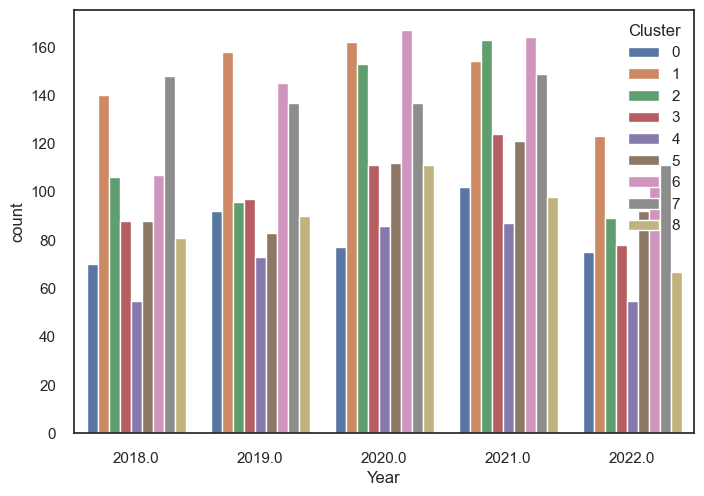

In [55]:
# For the last five years

import seaborn as sns

sns.set(style='white')

df_per = df2[df2['Year'] >= 2018]

sns.countplot(x="Year", hue="Cluster", data=df_per)

In [56]:
df2['Add'] = 1

In [57]:
import numpy as np

pivots = df2.pivot_table(index='Cluster', columns='Year', values='Add', aggfunc=np.sum)
pivots.columns = range(1990, 2023)
pivots.fillna(0, inplace=True)
pivots = pivots.astype('int')
pivots

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,13,12,6,10,20,17,10,...,39,32,32,43,69,70,92,77,102,75
1,0,1,5,8,12,14,12,15,22,21,...,86,73,82,75,145,140,158,162,154,123
2,1,0,8,14,6,8,14,12,12,10,...,31,42,58,55,104,106,96,153,163,89
3,0,0,4,5,6,4,9,10,21,16,...,39,49,45,49,83,88,97,111,124,78
4,0,2,2,1,3,6,5,8,11,8,...,30,33,35,32,55,55,73,86,87,55
5,0,1,3,3,6,4,3,6,8,9,...,29,24,37,47,87,88,83,112,121,92
6,0,1,2,6,6,7,4,14,15,12,...,63,64,70,61,104,107,145,167,164,104
7,0,1,8,11,3,5,12,12,14,20,...,93,93,72,95,131,148,137,137,149,111
8,0,0,1,3,3,5,8,9,10,6,...,44,50,53,60,78,81,90,111,98,67


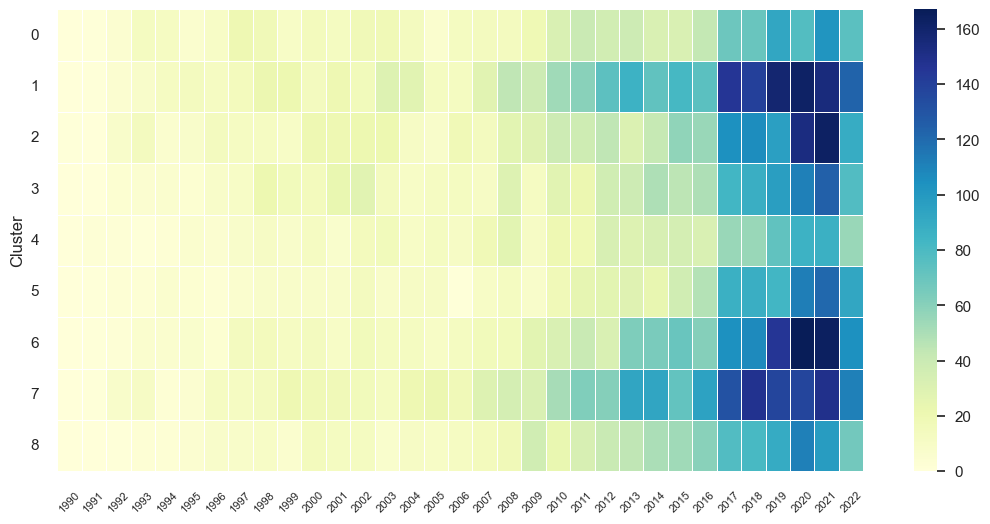

In [58]:
import matplotlib.pyplot as plt 

f, ax = plt.subplots(figsize=(13, 6))

g = sns.heatmap(pivots, linewidths=.5, cmap="YlGnBu")

for i, ax in enumerate(g.figure.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

g.figure.show()

<AxesSubplot: xlabel='Cluster', ylabel='Year'>

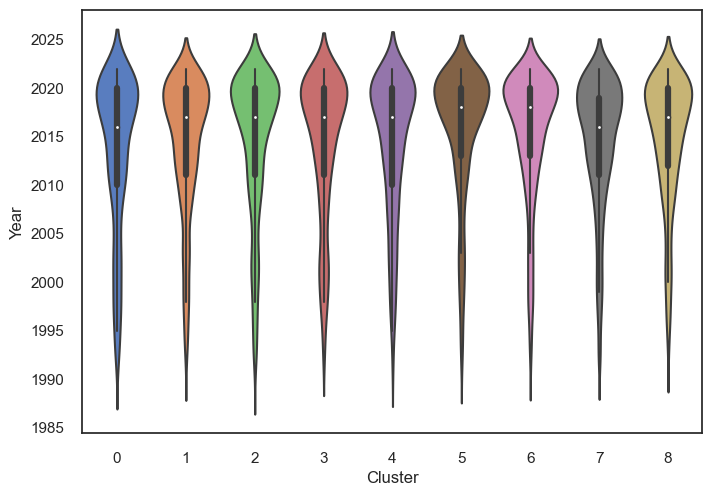

In [59]:
sns.violinplot(x="Cluster", y="Year", data=df2, palette="muted")

In [60]:
dd = pivots.T
dd.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8']

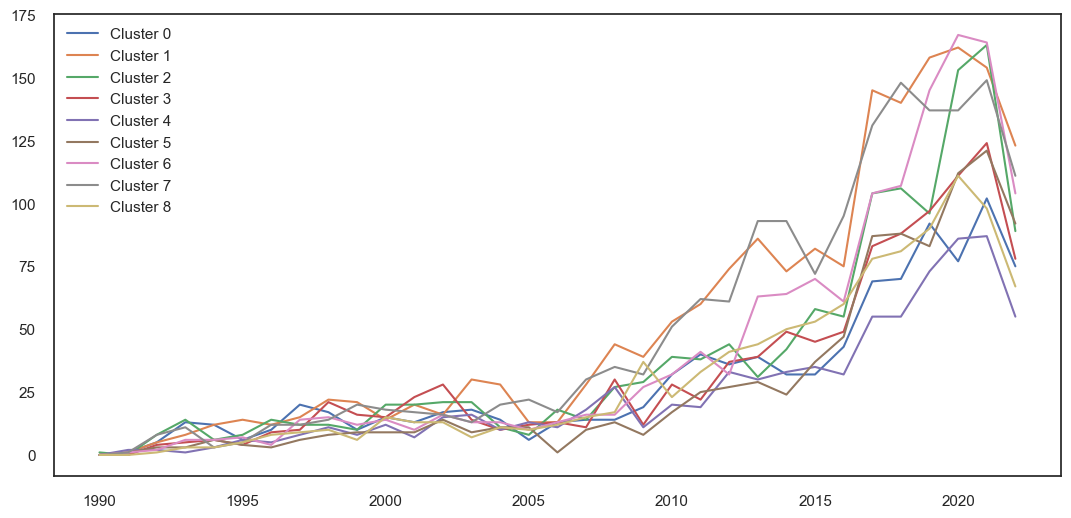

In [61]:
plt.figure(figsize=(13, 6))

legs = []
for i in range(len(dd.columns)):
    plt.plot(dd['%d' % i])
    legs.append('Cluster %d' % i)

plt.legend(legs)
plt.show()

In [62]:
df2.to_excel('Data/model_wos_rr.xlsx')

## AI Clustering 결과를 이용한 요약 방법

#### 이하 코드는 매우 오랜 시간 걸리므로 computing power를 고려해 실행해야 합니다.

In [1]:
import pandas as pd

df = pd.read_excel('Data/model_wos_rr.xlsx', index_col=0)

In [2]:
df['Cluster'].value_counts()

4    1815
8    1731
5    1432
6    1360
2    1128
0    1086
1     996
7     956
3     797
Name: Cluster, dtype: int64

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re

nltk.download('stopwords')
nltk.download('punkt')

# Read the text and tokenize into sentences
def read_article(text):
    
    sentences =[]
    
    sentences = sent_tokenize(text)
    for sentence in sentences:
        sentence.replace("[^a-zA-Z0-9]"," ")

    return sentences
    

# Create vectors and calculate cosine similarity b/w two sentences
def sentence_similarity(sent1,sent2,stopwords=None):
    if stopwords is None:
        stopwords = []
    
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
    
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    #build the vector for the first sentence
    for w in sent1:
        if not w in stopwords:
            vector1[all_words.index(w)]+=1
    
    #build the vector for the second sentence
    for w in sent2:
        if not w in stopwords:
            vector2[all_words.index(w)]+=1
            
    return 1-cosine_distance(vector1,vector2)

# Create similarity matrix among all sentences
def build_similarity_matrix(sentences,stop_words):
    #create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],stop_words)
                
    return similarity_matrix


# Generate and return text summary
def generate_summary(text, top_n):    
    stop_words = stopwords.words('english')
    summarize_text = []
    
    # Step1: read text and tokenize
    sentences = read_article(text)
    
    # Steo2: generate similarity matrix across sentences
    sentence_similarity_matrix = build_similarity_matrix(sentences,stop_words)
    
    # Step3: Rank sentences in similarirty matrix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    
    #Step4: sort the rank and place top sentences
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
    
    # Step 5: get the top n number of sentences based on rank    
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    
    # Step 6 : outpur the summarized version
    return " ".join(summarize_text),len(sentences)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/heavenly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/heavenly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
## 매우 실행에 오랜 시간이 걸립니다.
k=9

for i in range(k):
    text = ' '.join(df[df['Cluster']==i]['Abstract'].tolist())
    summary = generate_summary(text, 3) # TextRank 기법으로 각 범주마다 가장 중심성이 높은 3개의 문서를 추려낸다.
    print('Cluster Num: %d' % (i))
    print(summary)
    print('-----------------------')

KeyboardInterrupt: 

In [63]:
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Oh, PS; Oh, SJ",NaN,NaN,NaN,"Oh, Phil Seok; Oh, Sung Jin",NaN,NaN,What Teachers of Science Need to Know about Mo...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,891LN,NaN,NaN,NaN,NaN,2022-08-31,WOS:000300218600004,0
1,J,"Aktan, MB",NaN,NaN,NaN,"Aktan, Mustafa Bahadir",NaN,NaN,Pre-service Science Teachers' Views and Conten...,EGITIM VE BILIM-EDUCATION AND SCIENCE,...,Social Science Citation Index (SSCI),Education & Educational Research,141RG,NaN,NaN,NaN,NaN,2022-08-31,WOS:000318743600029,0
2,J,"Cheng, MF; Lin, JL",NaN,NaN,NaN,"Cheng, Meng-Fei; Lin, Jang-Long",NaN,NaN,Investigating the Relationship between Student...,INTERNATIONAL JOURNAL OF SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,CT3RV,NaN,NaN,NaN,NaN,2022-08-31,WOS:000362725500003,0
3,J,"Soltani, A",NaN,NaN,NaN,"Soltani, Asghar",NaN,NaN,"Influence of Motivating Science Class, Family,...",RESEARCH IN SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,NV3NQ,NaN,NaN,NaN,NaN,2022-08-31,WOS:000574233300001,0
4,J,"Krell, M; Walzer, C; Hergert, S; Kruger, D",NaN,NaN,NaN,"Krell, Moritz; Walzer, Christine; Hergert, Sus...",NaN,NaN,Development and Application of a Category Syst...,RESEARCH IN SCIENCE EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,JH0NM,NaN,NaN,NaN,NaN,2022-08-31,WOS:000492471000008,0


In [64]:
df.Abstract[0]

"The purpose of this article is to provide an overview of the nature of models and their uses in the science classroom based on a theoretical review of literature. The ideas that science philosophers and science education researchers have in common about models and modelling are scrutinised according to five subtopics: meanings of a model, purposes of modelling, multiplicity of scientific models, change in scientific models and uses of models in the science classroom. First, a model can be defined as a representation of a target and serves as a 'bridge' connecting a theory and a phenomenon. Second, a model plays the roles of describing, explaining and predicting natural phenomena and communicating scientific ideas to others. Third, multiple models can be developed in science because scientists may have different ideas about what a target looks like and how it works and because there are a variety of semiotic resources available for constructing models. Fourth, scientific models are tes

In [66]:
df['Article Title'][0]

'What Teachers of Science Need to Know about Models: An overview'

### Long T5를 이용한 요약

In [ ]:
import torch
from transformers import pipeline

summarizer = pipeline(
    "summarization",
    "pszemraj/long-t5-tglobal-base-16384-book-summary",
    device=0 if torch.cuda.is_available() else -1,
)
long_text = df.Abstract[0]

result = summarizer(long_text)
print(result[0]["summary_text"])